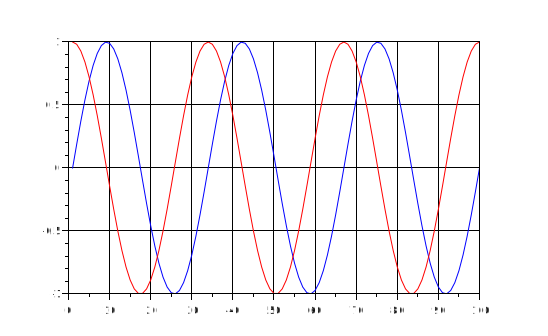

In [2]:
t = linspace(0,6*%pi, 100); //which diference is in 0.6 and 0,6?
plot(sin(t))
plot(cos(t), 'r')
xgrid

## Sistema Subamortecido de 2° Ordem

Simulação da planta G(s) = $2 / (s^2 + s + 2)$

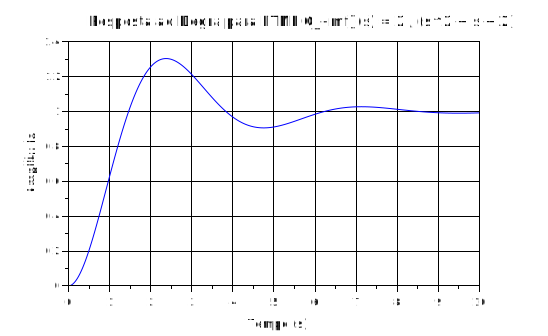

In [1]:
// Definindo a variável s
s = poly(0, 's');

// Definindo a FTMG G_{mf}(s) = 2 / (s^2 + s + 2)
FTMF = 2 / (s^2 + s + 2);

// Criando o sitema de função de tranferência
sys = syslin('c', FTMF);

// Simulação da resposta ao degrau
t = 0:0.01:10; // Definindo o intervalo de tempo
[y, x] = csim('step', t, sys); // Simulação da resposta ao degrau

// Plotando o gráfico
plot(t, y);
title("Resposta ao Degra para FTMF G_{mf}(s) = 2 / (s^2 + s + 2)");
xlabel("Tempo (s)");
ylabel("Amplitude");
xgrid();

Exemplo 1:

    1    
   ----  
   1 +s  


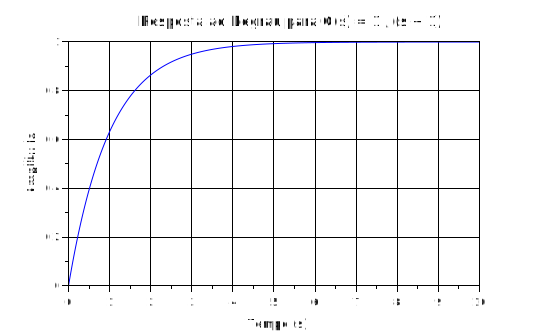

In [2]:
s = poly(0, 's');  // Definindo a variável s corretamente

// Definindo o numerador e o denominador de G(s)
numerador = 1;  // O numerador é 1
denominador = s + 1;  // O denominador é s + 1, diretamente

// Criando a função de transferência G(s)
G = syslin('c', numerador / denominador);

// Exibindo a função de transferência G(s)
disp(G);

// Simulação da resposta ao degrau
t = 0:0.01:10;
[y, x] = csim('step', t, G);

// Plotando o gráfico
plot(t, y);
title("Resposta ao Degrau para G(s) = 1 / (s + 1)");
xlabel("Tempo (s)");
ylabel("Amplitude");
xgrid();

/*
    O denominador é criado diretamente como s + 1, e não usamos poly([1 1], 's'),
    porque neste caso ele gera um polinômio a partir de raízes.
*/

### Exemplo de Malha fechada e malha aberta
- Malha Aberta: G(s) = $1 / (s + 1)$
- Malha Fechada: G(s) = $1 / (s + 2)$

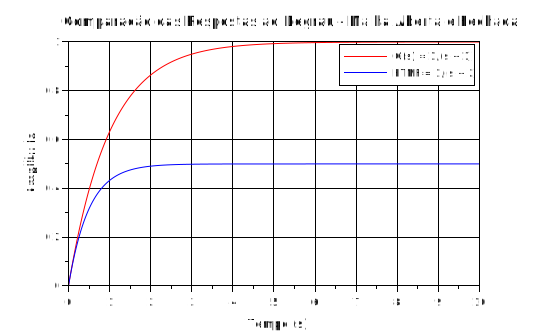

In [4]:
// Definindo a variável s
s = poly(0, 's');

// Definindo G(s) = 1 / (s + 1) (Malha Aberta)
G = 1 / (s + 1);

// Definindo a FTMF G_{mf}(s) = 1 / (s + 2) (Malha Fechada)
FTMF = 1 / (s + 2);

// Criando os sistemas de função de transferência
sys_G = syslin('c', G);        // Sistema malha aberta
sys_FTMF = syslin('c', FTMF);  // Sistema malha fechada

// Definindo o tempo de simulação
t = 0:0.01:10;  // Tempo de simulação de 0 a 10 segundos

// Simulação da resposta ao degrau para ambos os sistemas
[y_G, x_G] = csim('step', t, sys_G);        // Resposta ao degrau para G(s)
[y_FTMF, x_FTMF] = csim('step', t, sys_FTMF);  // Resposta ao degrau para FTMF

// Plotando as duas respostas no mesmo gráfico
clf;
plot(t, y_G, 'r');  // G(s) em vermelho
plot(t, y_FTMF, 'b');  // FTMF em azul
legend('G(s) = 1/(s + 1)', 'FTMF = 1/(s + 2)');
title("Comparação das Respostas ao Degrau - Malha Aberta e Fechada");
xlabel("Tempo (s)");
ylabel("Amplitude");
xgrid();

### Usando Variaveis de Estado

 G = [polynomial] of s
  -6 +11s -6s^2 +s^3
 A = [2x2 double]
   1.   2.
   3.   4.
 B = [2x1 double]
  -1.
   1.
 C = [1x2 double]
   1.   0.
 sys = [state-space]
  A (matrix) = [1,2;3,4]
  B (matrix) = [-1;1]
  C (matrix) = [1,0]
  D (matrix) = 0
  X0 (initial state) = [0;0]
  dt (time domain) = "c"


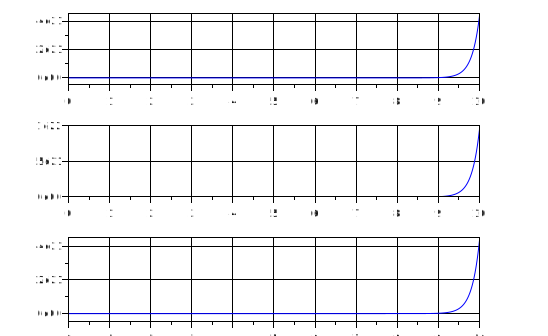

In [6]:
G=poly([1 2 3], 's')
A=[1 2; 3 4]
B=[-1; 1]
C = [1, 0]
sys = syslin('c', A, B, C)
t = linspace(0, 10, 1001);
[y,x] = csim('step', t, sys);
subplot(311)
plot(t, x(1,:));xgrid
subplot(312)
plot(t, x(2,:));xgrid
subplot(313);
plot(t, y); xgrid

# PD, PI

In [1]:
import matplotlib.pyplot as plt
import control as ctl

# Sistema de exemplo: G(s) = 1 / (s^2 + 2s + 2)
G = ctl.TransferFunction([1], [1, 2, 2])

# Controlador PD: C(s) = s+1
C_PD = ctl.TransferFunction([1, 1], [1])

# Controlador PI: C(s) = (s+1)/s
C_PI = ctl.TransferFunction([1, 1], [1, 0])

# Malha aberta
L_PD = C_PD * G
L_PI = C_PI * G

# Plot
plt.figure(figsize=(8,6))
ctl.rlocus(L_PD, Plot=True, label="PD")
ctl.rlocus(L_PI, Plot=True, label="PI")

plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Lugar das Raízes - Comparação PI vs PD")
plt.xlabel("Parte real (σ)")
plt.ylabel("Parte imaginária (jω)")
plt.grid(True)
plt.show()


Undefined variable: import
Undefined variable: import
# Sistema de exemplo: G(s) = 1 / (s^2 + 2s + 2)
  ^~~~~~~^
Error: syntax error, unexpected identifier, expecting ->

Undefined variable: ctl
# Controlador PD: C(s) = s+1
  ^~~~~~~~~~~^
Error: syntax error, unexpected identifier, expecting ->

Undefined variable: ctl
# Controlador PI: C(s) = (s+1)/s
  ^~~~~~~~~~~^
Error: syntax error, unexpected identifier, expecting ->

Undefined variable: ctl
# Malha aberta
  ^~~~~^
Error: syntax error, unexpected identifier, expecting ->

Undefined variable: C_PD

Undefined variable: C_PI
# Plot
  ^~~~^
Error: syntax error, unexpected identifier, expecting ->

Undefined variable: plt

Undefined variable: L_PD

Undefined variable: L_PI

Undefined variable: plt

Undefined variable: plt

Undefined variable: plt

Undefined variable: plt

Undefined variable: plt

Undefined variable: True

Undefined variable: plt
